## Table of Content

1. [Introduction](#section1)<br>
    - 1.1 [Principal Component Analysis (PCA) Vs. Multiple Discriminant Analysis (MDA)](#section1.1)<br>
    - 1.2 [Summarizing the PCA approach](#section1.2)<br>
2. [Generating some 3-dimensional sample data](#section2)<br>
3. [Taking the whole dataset ignoring the class labels](#section3)<br>
4. [Computing the d-dimensional mean vector](#section4)<br>
5. [Computing the Scatter Matrix](#section401)<br>
6. [Computing the Covariance Matrix (alternatively to the scatter matrix)](#section402)<br>
7. [Computing eigenvectors and corresponding eigenvalue](#section7)<br>
    - 7.1 [Checking the eigenvector-eigenvalue calculation](#section701)<br>
    - 7.2 [Visualizing the eigenvectors](#section702)<br>
8. [Sorting the eigenvectors by decreasing eigenvalues](#section5)<br>
9. [Choosing k eigenvectors with the largest eigenvalues](#section501)<br>
10. [Transforming the samples onto the new subspace](#section502)<br>
11. [Using the PCA() class from the matplotlib.mlab library](#section6)<br>
    - 11.1 [Class attributes of PCA()](#section11.1)<br>
    - 11.2. [Differences between the step by step approach and matplotlib.mlab.PCA()](#section11.2)<br>
    - 11.3 [Using the PCA() class from the sklearn.decomposition library to confirm our results](#section11.3)<br>

### 1. Introduction

**PCA Purpose**: 
  - Analyze data to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information <br>
  - project a feature space onto a smaller subspace that represents our data well <br><br>

#### 1.1 Principal Component Analysis (PCA) Vs. Multiple Discriminant Analysis (MDA)
- Both are linear transformation methods and closely related to each other.
- PCA finds the directions (components) that **maximize the variance** in our dataset while MDA finds the directions that **maximize the separation** (or discrimination) between different classes
- i.e In PCA we are trying to find the axes with maximum variances where the data is most spread (within a class, since PCA treats the whole data set as one class), and in MDA we are additionally maximizing the spread between classes.


#### 1.2 Summarizing the PCA approach
Listed below are the 6 general steps for performing a principal component analysis

1. Take the whole dataset consisting of d-dimensional samples ignoring the class labels
2. Compute the d-dimensional mean vector (i.e., the means for every dimension of the whole dataset)
3. Compute the scatter matrix (alternatively, the covariance matrix) of the whole data set
4. Compute eigenvectors (e1,e2,...,ed) and corresponding eigenvalues (λ1,λ2,...,λd)
5. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix WW(where every column represents an eigenvector)
6. Use this d×k eigenvector matrix to transform the samples onto the new subspace. <br><br>
This can be summarized by the mathematical equation: y=W.T × x (where x is a d×1-dimensional vector representing one sample, and y is the transformed k×1-dimensional sample in the new subspace.)

### 2. Generating some 3-dimensional sample data

generate 40 ,3-dimensional samples randomly drawn from a multivariate Gaussian distribution. <br>
Assume that the samples stem from two different classes, where one half (i.e., 20) samples of our data set are labeled ω1 (class 1) and the other half ω2 (class 2).

In [28]:
import numpy as np
np.random.seed(2)

mu_vec1 =  np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
class1_sample.shape


(3, 20)

In [29]:
mu_vec2 =  np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
class2_sample.shape

(3, 20)

In [30]:
class2_sample

array([[ 0.58068352,  1.32600343,  0.32232442,  1.73527958,  0.61848352,
         2.58448706,  1.69511961,  0.92278133,  0.59610773,  2.21788563,
         1.38186623,  2.40669624,  1.38047197, -1.34360319, -0.13313327,
         3.58529487,  0.28074616,  0.43976549,  0.72382051,  0.07110808],
       [ 0.8676711 , -1.04032305, -0.43943903,  0.34674973,  1.06648901,
        -1.65944946, -1.03346655,  1.82470301, -0.38451867,  0.53799465,
         1.56627544, -0.7379595 ,  0.78286473,  2.16152149,  1.43309255,
         2.83533272,  0.41658541,  0.09775393,  0.48311611,  3.55043824],
       [ 0.96042976,  1.04625552,  1.52429643,  1.84245628, -0.09873895,
         0.90854738,  0.81053074,  2.24821292,  2.36723542,  1.35088849,
         1.20420798,  2.04082395,  2.1735315 ,  1.38607805,  0.69591356,
         1.44068987,  0.67495037,  0.40902772,  0.30141005, -0.47317325]])

In [31]:
class2_sample[0,:]

array([ 0.58068352,  1.32600343,  0.32232442,  1.73527958,  0.61848352,
        2.58448706,  1.69511961,  0.92278133,  0.59610773,  2.21788563,
        1.38186623,  2.40669624,  1.38047197, -1.34360319, -0.13313327,
        3.58529487,  0.28074616,  0.43976549,  0.72382051,  0.07110808])

Populating the interactive namespace from numpy and matplotlib


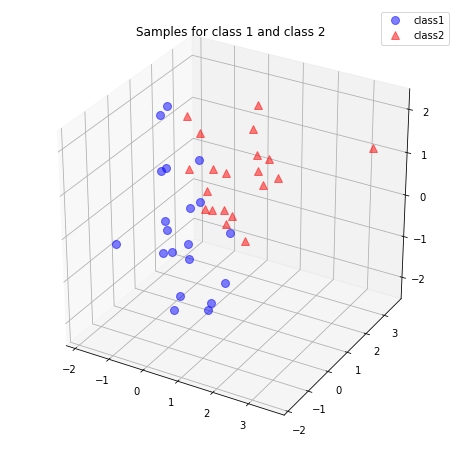

In [32]:
## how the samples of our two classes ω1 and ω2 are distributed, plot 3D
%pylab inline 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

### 3. Taking the whole dataset ignoring the class labels

Because we don’t need class labels for the PCA analysis, let us merge the samples for our 2 classes into one 3×40-dimensional array.

In [33]:
all_samples = np.concatenate((class1_sample,class2_sample), axis=1)
all_samples.shape

(3, 40)

In [34]:
all_samples[2,:]

array([-2.13619610e+00, -8.41747366e-01, -1.05795222e+00,  2.29220801e+00,
        5.39058321e-01,  1.17500122e+00, -8.78107893e-01, -9.88779049e-01,
       -6.37655012e-01, -1.53495196e-01, -2.43476758e+00,  1.35963386e+00,
        9.76147160e-06,  7.71011738e-01,  1.46767801e+00,  4.79705919e-02,
        1.00036589e+00, -7.44707629e-02, -6.34679305e-01, -1.85861239e+00,
        9.60429760e-01,  1.04625552e+00,  1.52429643e+00,  1.84245628e+00,
       -9.87389470e-02,  9.08547377e-01,  8.10530735e-01,  2.24821292e+00,
        2.36723542e+00,  1.35088849e+00,  1.20420798e+00,  2.04082395e+00,
        2.17353150e+00,  1.38607805e+00,  6.95913561e-01,  1.44068987e+00,
        6.74950372e-01,  4.09027725e-01,  3.01410050e-01, -4.73173248e-01])

### 4. Computing the d-dimensional mean vector

In [35]:
mean_x = np.mean(all_samples[0,:]) # 1st row
mean_y = np.mean(all_samples[1,:]) # 2nd row
mean_z = np.mean(all_samples[2,:]) # 3rd row

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.4409998 ]
 [0.31490462]
 [0.49425121]]


In [36]:
#all_samples
all_samples[:,10].reshape(3,1)

array([[-0.26905696],
       [ 2.23136679],
       [-2.43476758]])

### 5. Computing the Scatter Matrix

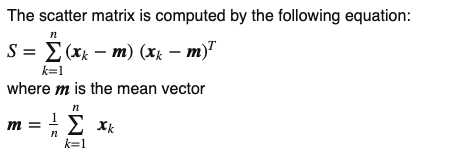

In [37]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]): # goes till 40th column
  x_k = (all_samples[:,i].reshape(3,1) - mean_vector)
  scatter_matrix += (x_k).dot(x_k.T)

print('Scatter Matrix:\n', scatter_matrix)


Scatter Matrix:
 [[50.50083594 -5.61897403 14.27132997]
 [-5.61897403 57.89958677  3.89835077]
 [14.27132997  3.89835077 58.58373802]]


### 6. Computing the Covariance Matrix (alternatively to the scatter matrix)

The equations for the covariance matrix and scatter matrix are very similar, the only difference is, that we use the scaling factor 1 / (N-1) covariance matrix. <br>Thus, their eigenspaces will be identical (identical eigenvectors, only the eigenvalues are scaled differently by a constant factor).

In [38]:
cov_mat = scatter_matrix/39  # N-1 =39 
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.29489323 -0.14407626  0.36593154]
 [-0.14407626  1.48460479  0.09995771]
 [ 0.36593154  0.09995771  1.50214713]]


In [39]:
## using np.cov is same as above
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.29489323 -0.14407626  0.36593154]
 [-0.14407626  1.48460479  0.09995771]
 [ 0.36593154  0.09995771  1.50214713]]


### 7. Computing eigenvectors and corresponding eigenvalues
To show that the eigenvectors are indeed identical whether we derived them from the scatter or the covariance matrix, let us put an assert statement into the code.  <br>
Also, we will see that the eigenvalues were indeed scaled by the factor 39 when we derived it from the scatter matrix.

In [40]:
## eigvalue and eigvector from scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

## eigvalue and eigvector from cov matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

print(eig_val_sc,"\n",eig_vec_sc)
print("\n")
print(eig_val_cov,"\n", eig_vec_cov )

[37.428595   69.38270652 60.17285921] 
 [[ 0.75826512  0.60805413 -0.23516841]
 [ 0.31665604 -0.02818996  0.94812145]
 [-0.56987977  0.79339492  0.21391948]]


[0.95970756 1.77904376 1.54289383] 
 [[ 0.75826512  0.60805413 -0.23516841]
 [ 0.31665604 -0.02818996  0.94812145]
 [-0.56987977  0.79339492  0.21391948]]


In [41]:
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[ 0.75826512]
 [ 0.31665604]
 [-0.56987977]]
Eigenvalue 1 from scatter matrix: 37.42859500297601
Eigenvalue 1 from covariance matrix: 0.9597075641788719
Scaling factor:  39.00000000000001
----------------------------------------
Eigenvector 2: 
[[ 0.60805413]
 [-0.02818996]
 [ 0.79339492]]
Eigenvalue 2 from scatter matrix: 69.38270652013391
Eigenvalue 2 from covariance matrix: 1.7790437569265094
Scaling factor:  39.00000000000002
----------------------------------------
Eigenvector 3: 
[[-0.23516841]
 [ 0.94812145]
 [ 0.21391948]]
Eigenvalue 3 from scatter matrix: 60.17285920800876
Eigenvalue 3 from covariance matrix: 1.5428938258463785
Scaling factor:  39.0
----------------------------------------


#### 7.1  Checking the eigenvector-eigenvalue calculation

To check that the eigenvector-eigenvalue calculation is correct and satisfy the equation

    Σv=λv 
    Where Σ = Covariance Matrix
          v = EigenVector
          λ = EigenValue


In [42]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

#### 7.2 Visualizing the eigenvectors

plot the eigenvectors centered at the sample mean.

Populating the interactive namespace from numpy and matplotlib


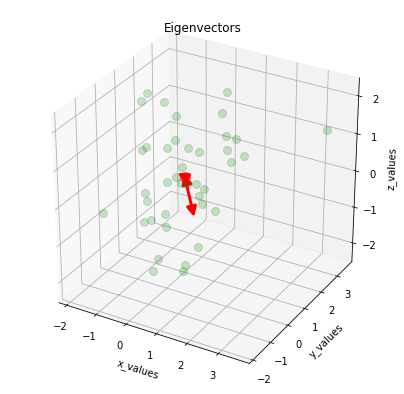

In [43]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

### 8. Sorting the eigenvectors by decreasing eigenvalues

In order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. <br><br>
Eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop. <br><br>
The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top k eigenvectors

In [44]:
eig_pairs = [(np.abs(eig_val_sc[i]),eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# sort eigenvalue from high to low
eig_pairs.sort(key=lambda x:x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

69.38270652013391
60.17285920800876
37.42859500297601


### 9. Choosing k eigenvectors with the largest eigenvalues

For our example we are reducing a 3-dimensional feature space to a 2-dimensional feature subspace, we are combining the two eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W

In [45]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)


Matrix W:
 [[ 0.60805413 -0.23516841]
 [-0.02818996  0.94812145]
 [ 0.79339492  0.21391948]]


### 10. Transforming the samples onto the new subspace

In the last step, we use the 2×3-dimensional matrix WW that we just computed to transform our samples onto the new subspace via the equation y=W.T×x.

In [48]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

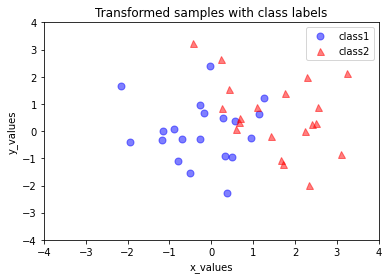

In [49]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

#### Using the PCA() class from the sklearn.decomposition library to confirm our results

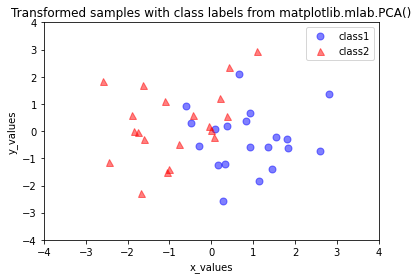

In [51]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

The plot above seems to be the near mirror image of the plot from out step by step approach. This is due to the fact that the signs of the eigenvectors can be either positive or negative, since the eigenvectors are scaled to the unit length 1, both we can simply multiply the transformed data by ×(−1) to revert the mirror image.

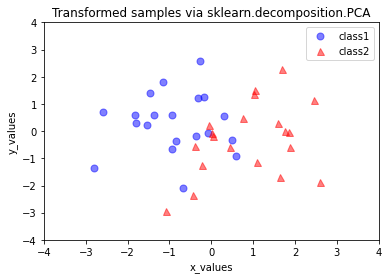

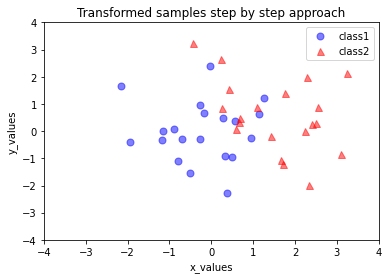

In [52]:
sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()